<a href="https://colab.research.google.com/github/Shahid0120/atlassian-allianz-neural-network/blob/main/01_model_encoded_no_transformations_data_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FNN using 'encoded-no-transformations.csv'
In this notebook i will create a FNN on the 'encoded-no-transformations.csv' using Pytorch to correctly classify wheather a claim was fraudulant or not

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from pathlib import Path
from torch.optim.sgd import SGD

In [2]:
# Cloning Repo
!git config --global user.name "Shahid0120"
!git config --global user.email "shahid.hussain0120@gmail.com"
!git config --global user.password "Acct3905^&"

# token =
username = 'Shahid0120'
repo='atlassian-allianz-neural-network'

!git clone https://{token}@github.com/{username}/{repo}

fatal: destination path 'atlassian-allianz-neural-network' already exists and is not an empty directory.


# Load Data

In [3]:
# Loading Data
dataPath = './atlassian-allianz-neural-network/data/01_encoded_no_transformations/01_encoded_no_transformations.csv'
data = pd.read_csv(dataPath)

X = data.drop(columns=['fraud_reported'])
Y = data['fraud_reported']

len(Y), len(X)

(2964, 2964)

# Check Shape of Data and sample data

In [4]:
X.shape, Y.shape

((2964, 124), (2964,))

In [5]:
X_sample = X.iloc[0]
Y_sample = Y.iloc[0]
print(f"Values for the X sample in index 0 : \n{X_sample}")
print(f"Values for the Y sample in index 0 : {Y_sample}")


Values for the X sample in index 0 : 
months_as_customer       0.556485
age                      0.466667
policy_deductable        0.000000
policy_annual_premium    0.447388
umbrella_limit           0.545455
                           ...   
auto_model_Tahoe         0.000000
auto_model_Ultima        0.000000
auto_model_Wrangler      0.000000
auto_model_X5            0.000000
auto_model_X6            0.000000
Name: 0, Length: 124, dtype: float64
Values for the Y sample in index 0 : 0.0


# Turn data into tensors and create test/train split

In [6]:
# X/Y is initally a DataFrame
X_ndarray = X.to_numpy()
Y_ndarray = Y.to_numpy()

# Convert to Tensor
X = torch.from_numpy(X_ndarray).type(torch.float)
Y = torch.from_numpy(Y_ndarray)


In [7]:
print(f"X is now a {type(X)} and X[0] has the lenght of\n {len(X[0])} which is the number of features")

X is now a <class 'torch.Tensor'> and X[0] has the lenght of
 124 which is the number of features


In [8]:
# Split Tensors into Train and Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size = 0.1,
    random_state=42
)

len(X_train), len(X_test), len(Y_train), len(Y_test)

print(f"The shape of X_train is {X_train.shape}")

The shape of X_train is torch.Size([2667, 124])


# Create Baseline Model

In [9]:
# Make device agnostic
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

# Model
class FraudModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=124, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# Instance of Model
model_0 = FraudModelV0().to(device)
model_0

FraudModelV0(
  (layer_1): Linear(in_features=124, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [10]:
print(model_0.state_dict())

OrderedDict([('layer_1.weight', tensor([[-0.0644,  0.0459,  0.0699,  0.0874, -0.0286, -0.0497,  0.0855, -0.0845,
          0.0662,  0.0350, -0.0257, -0.0884, -0.0375, -0.0422, -0.0277,  0.0061,
          0.0889,  0.0767,  0.0671, -0.0878,  0.0595, -0.0738,  0.0850, -0.0075,
          0.0528, -0.0249, -0.0079, -0.0706,  0.0024,  0.0784,  0.0018, -0.0379,
          0.0399,  0.0250, -0.0306,  0.0146,  0.0747,  0.0630,  0.0715, -0.0711,
         -0.0465,  0.0284,  0.0366, -0.0684, -0.0657, -0.0650, -0.0447, -0.0040,
          0.0800,  0.0269,  0.0605,  0.0532, -0.0021,  0.0409, -0.0443, -0.0061,
         -0.0253, -0.0148, -0.0347,  0.0240,  0.0486,  0.0277,  0.0513, -0.0586,
          0.0398,  0.0741,  0.0868, -0.0638, -0.0427,  0.0082,  0.0284,  0.0575,
         -0.0396, -0.0175,  0.0073,  0.0270,  0.0481, -0.0287,  0.0153,  0.0246,
         -0.0036, -0.0687,  0.0340, -0.0810,  0.0199,  0.0617, -0.0240,  0.0488,
          0.0751,  0.0745,  0.0702, -0.0497, -0.0800,  0.0601, -0.0827, -0.06

In [11]:
# Prediction with random Initialized Weight
with torch.inference_mode():
  untrained_Y_pred = model_0(X_test)

print(f"The Length of untrained predictions {len(untrained_Y_pred)} and the shape {untrained_Y_pred.shape} ")
print(f"The Length of the Y test {len(Y_test)} and the shape of Y test {Y_test.shape}")
print(f"The first 5 label of untrained Y {Y[:5]} vs Y_test {Y_test[:5]}")

The Length of untrained predictions 297 and the shape torch.Size([297, 1]) 
The Length of the Y test 297 and the shape of Y test torch.Size([297])
The first 5 label of untrained Y tensor([0., 0., 0., 0., 0.], dtype=torch.float64) vs Y_test tensor([1., 0., 0., 0., 1.], dtype=torch.float64)


Epoch 0 | Train Loss: 0.1971 | Train Accuracy: 93.29 | Test Loss: 0.2212 | Test Accuracy: 93.27
Epoch 1000 | Train Loss: 0.1966 | Train Accuracy: 93.36 | Test Loss: 0.2211 | Test Accuracy: 93.27
Epoch 2000 | Train Loss: 0.1962 | Train Accuracy: 93.44 | Test Loss: 0.2210 | Test Accuracy: 93.27
Epoch 3000 | Train Loss: 0.1959 | Train Accuracy: 93.44 | Test Loss: 0.2208 | Test Accuracy: 93.27
Epoch 4000 | Train Loss: 0.1955 | Train Accuracy: 93.59 | Test Loss: 0.2208 | Test Accuracy: 93.27
Epoch 5000 | Train Loss: 0.1953 | Train Accuracy: 93.63 | Test Loss: 0.2207 | Test Accuracy: 93.27
Epoch 6000 | Train Loss: 0.1950 | Train Accuracy: 93.66 | Test Loss: 0.2206 | Test Accuracy: 93.27
Epoch 7000 | Train Loss: 0.1948 | Train Accuracy: 93.63 | Test Loss: 0.2206 | Test Accuracy: 93.27
Epoch 8000 | Train Loss: 0.1946 | Train Accuracy: 93.63 | Test Loss: 0.2206 | Test Accuracy: 93.27
Epoch 9000 | Train Loss: 0.1944 | Train Accuracy: 93.63 | Test Loss: 0.2206 | Test Accuracy: 93.27


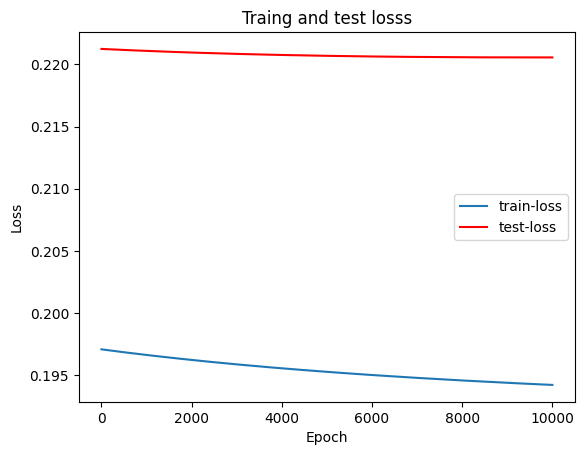

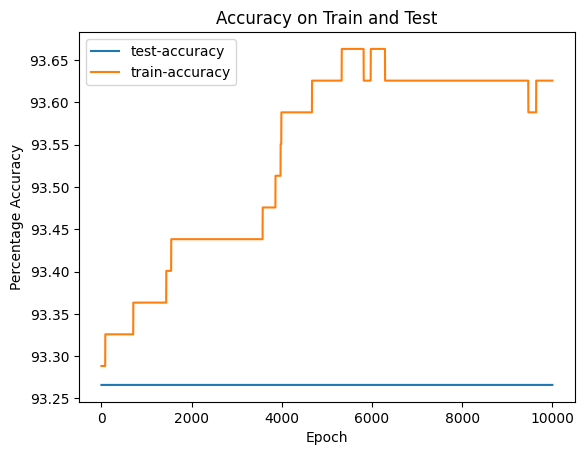

In [17]:
# loss function and gradient descent algorithm
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation inside
optimizer  = SGD(params=model_0.parameters(), lr=0.01)

# Calculate Accuracy
def accuracy(y_true, y_pred):
  sum_correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (sum_correct / len(y_pred)) * 100
  return accuracy

# Put into right device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

epochs = 10000

test_loss_arr = []
train_loss_arr = []
test_acuracy_arr = []
train_acuracy_arr = []

for epoch in range(epochs):
    # Train model
    model_0.train()

    # Forward pass
    Y_logits = model_0(X_train).squeeze()
    Y_probs = torch.round(torch.sigmoid(Y_logits))

    # Compute loss and accuracy for training
    loss = loss_fn(Y_logits, Y_train)
    train_loss_arr.append(loss.item())
    accuracy_train = accuracy(Y_train, Y_probs)
    train_acuracy_arr.append(accuracy_train)
    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Set the model to evaluation mode
    model_0.eval()

    # Inference on test data
    with torch.inference_mode():
        Y_test_logits = model_0(X_test).squeeze()
        Y_test_probs = torch.round(torch.sigmoid(Y_test_logits))

        # Compute loss and accuracy for testing
        test_loss = loss_fn(Y_test_logits, Y_test)
        test_loss_arr.append(test_loss.item())
        accuracy_test = accuracy(Y_test, Y_test_probs)
        test_acuracy_arr.append(accuracy_test)

    # Print results at each epoch
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {accuracy_train:.2f} | Test Loss: {test_loss.item():.4f} | Test Accuracy: {accuracy_test:.2f}")

plt.figure(1)
plt.plot(np.arange(epochs), train_loss_arr, label='train-loss')
plt.plot(np.arange(epochs), test_loss_arr, label='test-loss', color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Traing and test losss")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(epochs), test_acuracy_arr, label='test-accuracy')
plt.plot(np.arange(epochs), train_acuracy_arr, label='train-accuracy')
plt.xlabel("Epoch")
plt.ylabel("Percentage Accuracy")
plt.title("Accuracy on Train and Test")
plt.legend()
plt.show()



fatal: not a git repository (or any of the parent directories): .git
